In [1]:
%config Completer.use_jedi = False

In [2]:
%config IPCompleter.greedy=True

In [3]:
import random
import time
import matplotlib.pyplot as plt
import sys
import numpy as np 
from scipy.optimize import curve_fit 
import unittest
import math

# Q1. Write an algorithm to compute the factorial of a positive integer n:

<b>Note: this algrothim is loosley based on the algrothim presented in lecture 5</b>

-----------
Algorithm Return the factorial of a positive integer n

------------
<b>Input:</b> a positive integer n  
<b>Output:</b> the factorial of n  

1. function factorial(n):  
2. &emsp;if n <= 1 then
3. &emsp;&emsp;return 1
4. &emsp;endif
5. &emsp;return n * factorial(n - 1)


# Q2. For different values of n, implement your algorithm using two approaches:  iterative and recursive (tail and non-tail recursions).  For each case, plot running time as a function of n and compare the achieved results

In [4]:
# find the recursive limit of the machine
print("System recursion limit:", sys.getrecursionlimit())

System recursion limit: 3000


In [5]:
# generate a sequence of values in this range
MAX_LIMIT = 2000
vals = [i for i in range(MAX_LIMIT)]

In [6]:
# again this is based on the algorithm presented in lecture 5
# args is used to allow a single function to run all 3 versions of factorial as all don't have the same number of args
def nontail_rec(n, *args): 
    """Caluclates the factoiral of a positive integer n as argument using nontail recursion"""
    if n <= 1:
        return 1
    return n * nontail_rec(n - 1)

In [7]:
# again this is based on the algorithm presented in lecture 6
def tail_rec(n, acc):
    """Caluclates the factoiral of a positive integer n as argument using tail recursion"""
    if n <= 1:
        return acc
    return tail_rec(n -1, n * acc)

In [8]:
# args is used to allow a single function to run all 3 versions of factorial as all don't have the same number of args
def iterative(num, *args):
    """Caluclates the factoiral of a positive integer n as argument using an iterative approach"""
    total = 1
    for n in range(2, num+1):
        total *= n
    return total

First we will attempt a more naive approach, first we will time each function calculating each of the values of n from 0 to 2000, we will then plot these times to examine the running time for each of these values.

In [9]:
def implement_factorial_time(vals, func, *args):
    """returns the running time for a function func given as agument to calculate
    the factorial of a sequence of values argument vals, also returns the factorial results given as results"""
    results = [0] * len(vals) # pre instantiate all the lists as this is faster than appending new items to list
    n_time = [0] * len(vals)
    for i, val in enumerate(vals):
        start_time = time.perf_counter() # use per_counter to determine how long the function takes to run
        result = func(val, 1)
        end = time.perf_counter() # stop the per_counter 
        n_time[i] = end - start_time # store difference in times
        results[i] = result # store result
    return n_time, results

In [10]:
# test using iterative, tail recursive and non tail recursive techniques
iterative_time, results1 = implement_factorial_time(vals, iterative)
tail_time, results2 = implement_factorial_time(vals, tail_rec)
nontail_time, results3 = implement_factorial_time(vals, nontail_rec)

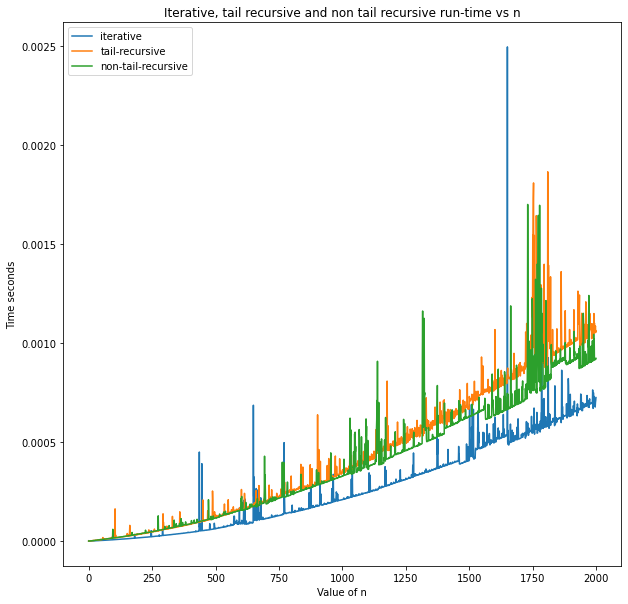

In [11]:
plt.figure(figsize=(10,10))
plt.plot(iterative_time, label="iterative")
plt.plot(tail_time, label="tail-recursive")
plt.plot(nontail_time, label="non-tail-recursive")
plt.title("Iterative, tail recursive and non tail recursive run-time vs n")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend()
#plt.savefig('iterative_tailrecursive_nontailrecursive.png')

From the above we can see while iterative appears to be the fastest approach the times taken for each value of n can vary wildly and does not increase in the way that we would expect. As there are many factors at play for example the scheduling of processes, cahce hit or misses or other processes running in the backgroung the time taken to calculate the factorial of a number could vary over a wide range. For this reason in the following section we use the average time taken to calulate a number using each of our factorial functions.

In [12]:
REPEAT = 10 # number of times we will repeat to get average

In [13]:
def average_time_fact(vals, func, REPEAT, *args):
    """determines the average running time for a function func to calculate the factorial of a sequence
    of numbers given as argument val"""
    avgtimes = [0] * len(vals) # pre instantiate all the lists as this is faster than appending new items to list
    for i, val in enumerate(vals):
        indtimes = [0] * REPEAT
        for k in range(REPEAT): # for each value repeat the caluclation REPEAT number of times to get an average
            start_time = time.perf_counter() # start timing
            result = func(val, 1)
            end = time.perf_counter() # stop timing
            indtimes[k] = end - start_time
        avgtimes[i] = (sum(indtimes)/ len(indtimes)) # get average time it takes to calculate number
    return avgtimes

In [14]:
#WARNING THIS WILL TAKE SOME TIME
# get average times for iterative, tail recursive and non tail recursive techniques
avgtimes1 = average_time_fact(vals, iterative, REPEAT)
avgtimes2 = average_time_fact(vals, tail_rec, REPEAT)
avgtimes3 = average_time_fact(vals, nontail_rec, REPEAT)

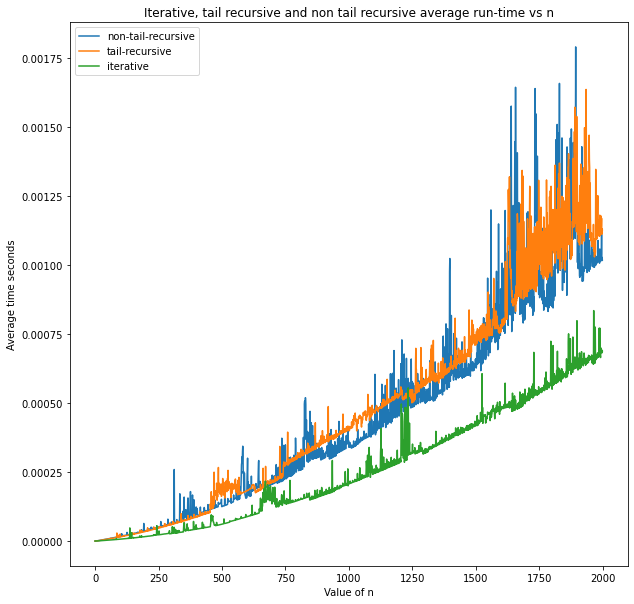

In [15]:
plt.figure(figsize=(10,10))
plt.plot(avgtimes3, label="non-tail-recursive")
plt.plot(avgtimes2, label="tail-recursive")
plt.plot(avgtimes1, label="iterative")
plt.title("Iterative, tail recursive and non tail recursive average run-time vs n")
plt.xlabel("Value of n")
plt.ylabel("Average time seconds")
plt.legend()
#plt.savefig('iterative_tailrecursive_nontailrecursive_average.png')

From the above we can see that this produces a much more realistic representation of the time it takes to compute the factorial for a number based on each of the three approaches. While there are still some outliers, this could be improved by sampling again from a larger number of repititions for each value of n. As speed is a key component of this assignment and this would certainly add significant overhead to the length of time taken to run this notebook for grading, 10 samples was chosen as an optimal number to display the approximate average runtimes for each version of the factorial algrothim. This is still quite slow as we have two for loops and we are also looping/ doing recursion in the factorial calls. Since this is at least $\mathcal{O}(n^3)$ this results in a high time complexity and consequently impacts running time.

### Unit tests

In [16]:
# these unit tests are based on the code presented in lab 3
class TestNonTail(unittest.TestCase):
    """Unit tests for the nontail_rec function"""
    def test1(self):
        self.assertTrue(nontail_rec(5) == 120)
        
    def test_2(self):
        self.assertTrue(nontail_rec(10) == 3628800)
    
    def test_3(self):
        self.assertTrue(nontail_rec(100) == math.factorial(100))
        
class TestTail(unittest.TestCase):
    """Unit tests for the tail_rec function"""
    def test1(self):
        self.assertTrue(tail_rec(5, 1) == 120)
        
    def test_2(self):
        self.assertTrue(tail_rec(10, 1) == 3628800)
        
    def test_3(self):
        self.assertTrue(tail_rec(100, 1) == math.factorial(100))
        
class TestIterative(unittest.TestCase):
    """Unit tests for the iterative function"""
    def test1(self):
        self.assertTrue(iterative(5) == 120)
        
    def test_2(self):
        self.assertTrue(iterative(10) == 3628800)

    def test_3(self):
        self.assertTrue(iterative(100) == math.factorial(100))

class TestImplementFactorial(unittest.TestCase):
    """Unit tests for the implement factorial function"""
    def test1(self):
        test1, result1 = implement_factorial_time([1, 2, 3], iterative)
        self.assertTrue(len(test1) == 3)        
        self.assertTrue(result1 == [1, 2, 6])        
        
        
class TestAverageTimes(unittest.TestCase):
    """Unit tests for the average times function"""
    def test1(self):
        test1 = average_time_fact([1, 2, 3], iterative, 5)
        self.assertTrue(len(test1) == 3)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test1 (__main__.TestAverageTimes) ... ok
test1 (__main__.TestImplementFactorial) ... ok
test1 (__main__.TestIterative) ... ok
test_2 (__main__.TestIterative) ... ok
test_3 (__main__.TestIterative) ... ok
test1 (__main__.TestNonTail) ... ok
test_2 (__main__.TestNonTail) ... ok
test_3 (__main__.TestNonTail) ... ok
test1 (__main__.TestTail) ... ok
test_2 (__main__.TestTail) ... ok
test_3 (__main__.TestTail) ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.006s

OK


## Comparing the achieved results:

From the above plots we can see that the iterative technique is the fastest of the 3 approaches. The next fastest approach is the non tail-recursive and finally the slowest is the tail-recursive. The running time for each of these approaches appears to increase slowly at a constant rate while the values increase. This is explored in more detail in the report.

# Be creative!
The following shows the memory usage of each of the algrothims, over a number of runs as we can see iterative has the least memory usage, this is followed by nontail recursive and finally tail recursive. My thoughts as to why tail recursive is the worst is because python is not optimising the call stack and the accumulator is being stored at every level in the stack, this leads to memory waste. The non tail does not have as much waste as the stack is only storing the value n at each level and not the n * acc which would be much larger.

In [17]:
# the following comes from https://stackoverflow.com/questions/19092812/measure-max-memory-usage-with-ipython-like-timeit-but-memit
%load_ext memory_profiler

In [18]:
# the following comes from https://stackoverflow.com/questions/19092812/measure-max-memory-usage-with-ipython-like-timeit-but-memit
%memit iterative(2000)

peak memory: 114.27 MiB, increment: 0.12 MiB


In [19]:
# the following comes from https://stackoverflow.com/questions/19092812/measure-max-memory-usage-with-ipython-like-timeit-but-memit
%memit nontail_rec(2000)

peak memory: 115.16 MiB, increment: 0.82 MiB


In [20]:
# the following comes from https://stackoverflow.com/questions/19092812/measure-max-memory-usage-with-ipython-like-timeit-but-memit
%memit tail_rec(2000, 1)

peak memory: 115.70 MiB, increment: 1.04 MiB


Using the line_profiler package, we can see the hits per line and the time per hit, from this we can see that the tail recursive function has a twice as long time per hit for the return statement. This displays that this line is the bottleneck of the algrothim and slows function down compared to the other two implementations.

In [21]:
# the following comes form https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5
%load_ext line_profiler

In [22]:
# the following comes form https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5
%lprun -f iterative iterative(1000)

Timer unit: 1e-07 s

Total time: 0.0012634 s
File: <ipython-input-8-1694e1ffb53d>
Function: iterative at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     2                                           def iterative(num, *args):
     3                                               """Caluclates the factoiral of a positive integer n as argument using an iterative approach"""
     4         1         18.0     18.0      0.1      total = 1
     5      1000       4202.0      4.2     33.3      for n in range(2, num+1):
     6       999       8410.0      8.4     66.6          total *= n
     7         1          4.0      4.0      0.0      return total

In [23]:
# the following comes form https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5
%lprun -f tail_rec tail_rec(1000, 1)

Timer unit: 1e-07 s

Total time: 0.0029601 s
File: <ipython-input-8-ef4ae3cd7220>
Function: tail_rec at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def tail_rec(n, acc):
     2                                               """Caluclates the factoiral of a positive integer n as argument using tail recursion"""
     3      1000       7223.0      7.2     24.4      if n <= 1:
     4         1         11.0     11.0      0.0          return acc
     5       999      22367.0     22.4     75.6      return tail_rec(n -1, n * acc)

In [24]:
# the following comes form https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5
%lprun -f nontail_rec nontail_rec(1000)

Timer unit: 1e-07 s

Total time: 0.001809 s
File: <ipython-input-7-25b387723e91>
Function: nontail_rec at line 2

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     2                                           def nontail_rec(n, *args): 
     3                                               """Caluclates the factoiral of a positive integer n as argument using nontail recursion"""
     4      1000       6856.0      6.9     37.9      if n <= 1:
     5         1         10.0     10.0      0.1          return 1
     6       999      11224.0     11.2     62.0      return n * nontail_rec(n - 1)

### Runtimes slight non-linearity

While the runtimes of each of the implementations was seen to increase at a near constant rate, there was a slight curve to the runtimes that was not expected. This was the source of much frustration and investigation. My leading explination for this is that muliplication of very large values in python takes more time than smaller values. This may be due to the storage/ implementation of multiplation in python and it's overheads. An example is provided below.

In [25]:
largemultimes = []
largevals = [math.factorial(i) for i in range (2000)]
for i in range(len(largevals) - 1):
    n = largevals[i+1]
    n_1 = largevals[i]
    start = time.perf_counter()
    n * n_1
    end = time.perf_counter()
    largemultimes.append(end)

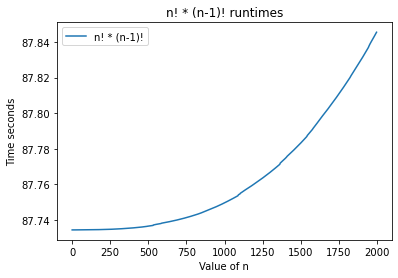

In [31]:
plt.title("n! * (n-1)! runtimes")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.plot(largemultimes, label="n! * (n-1)!")
plt.legend()
#plt.savefig('example_multiplication_times.png')

As we can see from this simple example the time taken to multiply large factorial values takes more time than smaller factorial numbers. This also has a very similar slight curve to the factorial runtimes. As we assume that primitive operations take the same time for small values and large values when calculating the big-$\mathcal{O}$ of an algrothim this may cause slight descrepencies in the produced runtimes that we expect to be perfectly linearly increasing. This explains the slight non-linearlity that we say in the earlier runtimes and average runtimes.

# Use one of the sequences obtained from task 2 as an input forsearch algorithms.  Implement with two methods from:  linearsearch, iterative binary and recursive binary

The factorials of the iterative factorial function was chosen as the input for the search algrothim, this was chosen as it is reproducable, it is already sorted and it ensures that the values used are all of the same type.

In [32]:
output = list(results1) # make a copy of the list of factorials

In [33]:
def linear_search(l, sval):
    """Finds and returns the position of a value sval in the list l using linear search algorithm,
    None is returned when the item is not in the list"""
    for i in range(len(l)):
        if l[i] == sval: # if value found
            return i # return the position of i
    else: # when for loop exausted, all elements searched
        return None # return none, representing not found

In [34]:
# the following implementation is based on the algorithm presented in lecture 4
def iter_binary(l, sval):
    """Finds and returns the position of a value sval in the list l using iterative binary search algorithm,
    None is returned when the item is not in the list"""
    low = 0
    high = len(l) - 1
    while low<= high:
        mid = (low + high)//2
        if l[mid] > sval: #if the mid value is larger than the search value
            high = mid -1
        elif l[mid] < sval: # if the mid valud is smaller than the search value
            low = mid + 1
        else:
            return mid # return the position of i
    return None # return none, representing not found

### Testing out these algrothims with the sequences obtained from task 2:

In [35]:
# test the linear search implementation
test_values = [(len(output) -1)// 2, 0, len(output) -1, (len(output) -1)// 4] # define some values in output to search for
for val in test_values:
    start_time = time.perf_counter()
    result = linear_search(output, output[val])
    end = time.perf_counter() - start_time
    print("Found value: {:d} at position: {} in : {:.30f} seconds\n".format(output[val], result, end))

Found value: 402387260077093773543702433923003985719374864210714632543799910429938512398629020592044208486969404800479988610197196058631666872994808558901323829669944590997424504087073759918823627727188732519779505950995276120874975462497043601418278094646496291056393887437886487337119181045825783647849977012476632889835955735432513185323958463075557409114262417474349347553428646576611667797396668820291207379143853719588249808126867838374559731746136085379534524221586593201928090878297308431392844403281231558611036976801357304216168747609675871348312025478589320767169132448426236131412508780208000261683151027341827977704784635868170164365024153691398281264810213092761244896359928705114964975419909342221566832572080821333186116811553615836546984046708975602900950537616475847728421889679646244945160765353408198901385442487984959953319101723355556602139450399736280750137837615307127761926849034352625200015888535147331611702103968175921510907788019393178114194545257223865541461062892187960

In [36]:
# test the iterative binary search implementation
for val in test_values:
    start_time = time.perf_counter()
    result = iter_binary(output, output[val])
    end = time.perf_counter() - start_time
    print("Found value: {} at position: {} in : {:.30f} seconds\n".format(output[val], result, end))

Found value: 402387260077093773543702433923003985719374864210714632543799910429938512398629020592044208486969404800479988610197196058631666872994808558901323829669944590997424504087073759918823627727188732519779505950995276120874975462497043601418278094646496291056393887437886487337119181045825783647849977012476632889835955735432513185323958463075557409114262417474349347553428646576611667797396668820291207379143853719588249808126867838374559731746136085379534524221586593201928090878297308431392844403281231558611036976801357304216168747609675871348312025478589320767169132448426236131412508780208000261683151027341827977704784635868170164365024153691398281264810213092761244896359928705114964975419909342221566832572080821333186116811553615836546984046708975602900950537616475847728421889679646244945160765353408198901385442487984959953319101723355556602139450399736280750137837615307127761926849034352625200015888535147331611702103968175921510907788019393178114194545257223865541461062892187960

In the following we will find the average time to find an element at each position of the list using both the linear search and iterative bianry algrothims. We will again repeat the number of times each number is seached for and get the average as this will allow us to get a clearer image of the true time it takes for the algrothim to run. As the search algrothims take significantly less time than the factorial algrothims, I decided to increase the number of times each value is calculated and timed. Search times when the element is not in the list will be explored in the next section. A slight warning is to remember that if you re-run code from earlier with the new REPEAT value it will take significantly longer repeating 100 times instead of 10.

In [37]:
REPEAT = 100

In [38]:
def average_serach(output, func, REPEAT):
    """Calculates the average time taken to find each of the elements in a sequence output, using the function func
    and averaging the time over REPEAT number of samples"""
    times = [0] * len(output)
    for i, t in enumerate(output):
        indtimes = [0] * REPEAT
        for k in range(REPEAT): # get the average over REPEAT number of tries
            start = time.perf_counter()
            func(output, t)
            end = time.perf_counter() - start
            indtimes[k] = end
        times[i] = (sum(indtimes)/ len(indtimes)) # get the average times
    return times

In [39]:
# WARNING THIS WILL TAKE SOME TIME
lineartimes = average_serach(output, linear_search, REPEAT)
iterbintimes = average_serach(output, iter_binary, REPEAT)

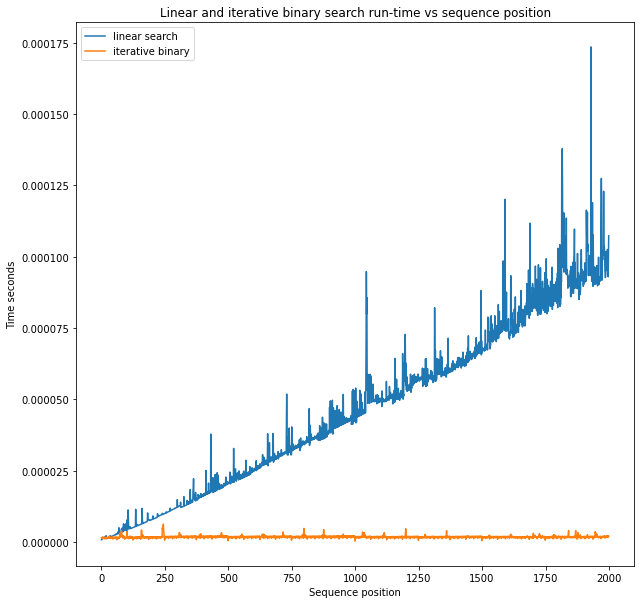

In [43]:
plt.figure(figsize=(10,10))
plt.plot(lineartimes, label="linear search")
plt.plot(iterbintimes, label="iterative binary")
plt.title("Linear and iterative binary search run-time vs sequence position")
plt.xlabel("Sequence position")
plt.ylabel("Time seconds")
plt.legend()
#plt.savefig('linear_iterative_serach_average.png')

### Unit tests

In [45]:
# these unit tests are based on the code presented in lab 3
class TestLinearSearch(unittest.TestCase):
    """Unit tests for the linear_search function"""
    def test1(self):
        self.assertTrue(linear_search(output, output[100]) == 100)
        
    def test_2(self):
        self.assertTrue(linear_search(output, output[1500]) == 1500)
        
    def test_3(self):
        self.assertTrue(linear_search(output, 10e10) == None)
        
    def test_4(self):
        self.assertTrue(linear_search(output, 1) == 0)
        
    def test_5(self):
        self.assertTrue(linear_search([1, 2, 3, 4, 5], 1) == 0)
        
class TestIterativeBinary(unittest.TestCase):
    """Unit tests for the iter_binary function"""
    def test1(self):
        self.assertTrue(iter_binary(output, output[100]) == 100)
        
    def test_2(self):
        self.assertTrue(iter_binary(output, output[1500]) == 1500)
        
    def test_3(self):
        self.assertTrue(iter_binary(output, 10e10) == None)
        
    def test_4(self):
        self.assertTrue(iter_binary(output, 1) == 0)
        
    def test_5(self):
        self.assertTrue(iter_binary([1, 2, 3, 4, 5], 1) == 0)
        
class TestAverageSearch(unittest.TestCase):
    """Unit tests for the average_serach function"""
    def test1(self):
        t = average_serach([1, 2, 3], linear_search, 5)
        self.assertTrue(len(t) == 3)

unittest.main(argv=[''], verbosity=2, exit=False)

test1 (__main__.TestAverageSearch) ... ok
test1 (__main__.TestAverageTimes) ... ok
test1 (__main__.TestImplementFactorial) ... ok
test1 (__main__.TestIterative) ... ok
test_2 (__main__.TestIterative) ... ok
test_3 (__main__.TestIterative) ... ok
test1 (__main__.TestIterativeBinary) ... ok
test_2 (__main__.TestIterativeBinary) ... ok
test_3 (__main__.TestIterativeBinary) ... ok
test_4 (__main__.TestIterativeBinary) ... ok
test_5 (__main__.TestIterativeBinary) ... ok
test1 (__main__.TestLinearSearch) ... ok
test_2 (__main__.TestLinearSearch) ... ok
test_3 (__main__.TestLinearSearch) ... ok
test_4 (__main__.TestLinearSearch) ... ok
test_5 (__main__.TestLinearSearch) ... ok
test1 (__main__.TestNonTail) ... ok
test_2 (__main__.TestNonTail) ... ok
test_3 (__main__.TestNonTail) ... ok
test1 (__main__.TestTail) ... ok
test_2 (__main__.TestTail) ... ok
test_3 (__main__.TestTail) ... ok

----------------------------------------------------------------------
Ran 22 tests in 0.010s

OK


# Be creative!

In [46]:
# the following comes from https://stackoverflow.com/questions/19092812/measure-max-memory-usage-with-ipython-like-timeit-but-memit
%memit linear_search(output, output[-1])

peak memory: 135.98 MiB, increment: 0.00 MiB


In [47]:
# the following comes from https://stackoverflow.com/questions/19092812/measure-max-memory-usage-with-ipython-like-timeit-but-memit
%memit iter_binary(output, output[-1])

peak memory: 135.98 MiB, increment: 0.00 MiB


as we can see the amount of memory to find a element in a list using these techniques is very small

In [48]:
# the following comes form https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5
%lprun -f linear_search linear_search([1, 2, 3, 4, 5], 4)

Timer unit: 1e-07 s

Total time: 2.16e-05 s
File: <ipython-input-49-ae62c47cbc0f>
Function: linear_search at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def linear_search(l, sval):
     2                                               """Finds and returns the position of a value sval in the list l using linear search algorithm,
     3                                               None is returned when the item is not in the list"""
     4         4         38.0      9.5     17.6      for i in range(len(l)):
     5         4        172.0     43.0     79.6          if l[i] == sval:
     6         1          6.0      6.0      2.8              return i
     7                                               else:
     8                                                   return None

In [49]:
# the following comes form https://stackoverflow.com/questions/44734297/how-to-profile-python-3-5-code-line-by-line-in-jupyter-notebook-5
%lprun -f iter_binary iter_binary([1, 2, 3, 4, 5], 4)

Timer unit: 1e-07 s

Total time: 6.3e-06 s
File: <ipython-input-50-195138325f5a>
Function: iter_binary at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def iter_binary(l, sval):
     2                                               """Finds and returns the position of a value sval in the list l using iterative binary search algorithm,
     3                                               None is returned when the item is not in the list"""
     4         1         13.0     13.0     20.6      low = 0
     5         1         11.0     11.0     17.5      high = len(l) - 1
     6         2          8.0      4.0     12.7      while low<= high:
     7         2         10.0      5.0     15.9          mid = (low + high)//2
     8         2          7.0      3.5     11.1          if l[mid] > sval:
     9                                                       high = mid -1
    10         2          7.0      3.5     11.1          elif l[mid] < sval:
    11         1          4.0      4.0      6.3              low = mid + 1
    12                                                   else:
    13         1          3.0      3.0      4.8              return mid
    14                                               return None

For the linear search function we can see that the most time is spent on the comparison of the value at a position and the target value. It becomes apparent that looping through each of the values in this way is not as efficient as using the iterative binary search. In the binary search we see that there is no lione that is a particular bottleneck for the algrothim.

# For each approach, compute the best and worst running times.  Give some examples by plotting the running time as a function of n

-----------
Algorithm Linear Search

------------

<b>Input:</b> Sorted array size n, search value  
<b>Output:</b> search value index

1. linear_search(arr, val):  
2. &emsp;foreach i in [0, n - 1] do &emsp;<b># 2 ops per loop</b>
3. &emsp;&emsp;if arr[i] = val then &emsp;<b># 2 ops per loop</b>
4. &emsp;&emsp;&emsp;return i &emsp;<b># 1 op per loop, sometimes</b>
5. &emsp;&emsp;end if
6. &emsp;endfor
7. &emsp;return None &emsp;<b># 1 op per loop, sometimes</b>

best running time: $\mathcal{O}(1)$

worst running time: $\mathcal{O}(n)$

-----------
Algorithm Iterative Binary Search

------------
<b>The following algorithm is based on the material presented in lecture 4</b> 

<b>Input:</b> Sorted array arr size n, left value l, right value r, search value  
<b>Output:</b> search value index

1. binary_search(arr, val):  
2. &emsp;low $\leftarrow$ 0    &emsp;<b># 1 op</b>
3. &emsp;high $\leftarrow$ n - 1    &emsp;<b># 1 op</b>
4. &emsp;while low <= high do &emsp;<b># 1 op per loop</b>
5. &emsp;&emsp;mid $\leftarrow$ (low + high)/2  &emsp;<b># 3 ops per loop</b>
6. &emsp;&emsp;if arr[mid] > val then   &emsp;<b># 2 ops per loop</b>
7. &emsp;&emsp;&emsp;high $\leftarrow$ mid - 1  &emsp;<b># 2 ops per loop sometimes</b>
8. &emsp;&emsp;else if arr[mid] < val then  &emsp;<b># 2 ops per loop sometimes</b>
9. &emsp;&emsp;&emsp;low $\leftarrow$ mid + 1  &emsp;<b># 2 ops per loop sometimes</b>
10. &emsp;&emsp;else  
11. &emsp;&emsp;&emsp;return mid &emsp;<b># 1 op per loop sometimes</b>
12. &emsp;&emsp;endif
13. &emsp;endwhile
14. &emsp;return None &emsp;<b># 1 op sometimes</b>


best running time: $\mathcal{O}(1)$

worst running time: $\mathcal{O}(log\ n)$

In [50]:
search_vals = list(output)
MAX_SEARCH = len(search_vals)

In [51]:
def worst_runtime(func, invals, REPEAT):
    """Calculates the worst runtime for both the linear search function and the iterative bianry serach function
    returns a list of the worst times according to n the length of the list searched"""
    worst_iter = [0] * len(invals)
    new_val = max(invals) + 1 # create a element to search for not in the list, corresponds to worst time
    for k in range(len(invals)):
        search_vals = invals[:k] # change size of list to compare search times for different legnths
        worst_average = [0] * REPEAT
        for i in range(REPEAT):
            start_time = time.perf_counter()
            func(search_vals, new_val) # serach for new element not in list
            end = time.perf_counter() - start_time
            worst_average[i] = end
        worst_iter[k] = (sum(worst_average)/len(worst_average))
    return worst_iter

In [52]:
worst_linear = worst_runtime(linear_search, search_vals, REPEAT)
worst_binary = worst_runtime(iter_binary, search_vals, REPEAT)

In [53]:
def best_runtime_linear(invals, REPEAT):
    """Calculates the best runtime for the linear search function returns a list of the best
    times according to n the length of the list searched"""
    best_iter = [0] * len(invals)
    for k in range(1, len(invals)):
        search_vals = invals[:k]  # change size of list to compare search times for different legnths
        best_average = [0] * REPEAT
        first_val = invals[0] # get the first value in the list
        for i in range(REPEAT):
            start_time = time.perf_counter()
            linear_search(search_vals, first_val) # search for first value in the list as this will be best run time
            end = time.perf_counter() - start_time
            best_average[i] = end
        best_iter[k] = (sum(best_average)/len(best_average))
    return best_iter

In [54]:
def best_runtime_binary(invals, REPEAT):
    """Calculates the best runtime for the iterative binary search function returns a list of the best
    times according to n the length of the list searched"""
    best_iter = [0] * len(invals)
    for k in range(1, len(invals)):
        search_vals = invals[:k]  # change size of list to compare search times for different legnths
        best_average = [0] * REPEAT
        middle_val = search_vals[(len(search_vals) - 1)//2] # get middle value in the list
        for i in range(REPEAT):
            start_time = time.perf_counter()
            iter_binary(search_vals, middle_val) # search for middle value as this will be the best run time
            end = time.perf_counter() - start_time
            best_average[i] = end
        best_iter[k] = (sum(best_average)/len(best_average))
    return best_iter

In [55]:
best_linear = best_runtime_linear(search_vals, REPEAT)
best_binary = best_runtime_binary(search_vals, REPEAT)

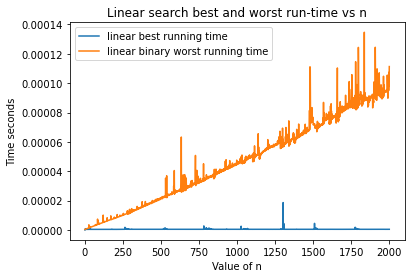

In [59]:
plt.plot(best_linear, label="linear best running time")
plt.plot(worst_linear, label="linear binary worst running time")
plt.title("Linear search best and worst run-time vs n")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend()
#plt.savefig('best_worst_linear.png')

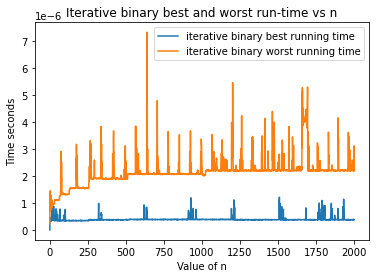

In [62]:
plt.plot(best_binary, label="iterative binary best running time")
plt.plot(worst_binary, label="iterative binary worst running time")
plt.title("Iterative binary best and worst run-time vs n")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend()
#plt.savefig('best_worst_binary.png')

In the above section we computed the best and worst running times based on our observations on the algrothims. These were  in line with the results that we would have expected. With the plots representing the respective calculated running time quite accurately. In the following section we will calculate the best and worst running times based a range of lengths of sequences using the max and min python function. This will allow us to determine if the best and worst case senarios that we determined by examining the algrothims are in line with the actual best and worst times when each value in the sequence is searched for. We will also search for values that are not in the list to ensure that all cases are covered. As we are calculating an average and also examining a range of sequence lengths, we will examine sequence lengths by increasing values of n by 5 at a time. This ensures that a wide range of values are examined while keeping running time relatively short.

In [63]:
STEP = 5

In [64]:
def best_worst_runtime(func, search_vals, REPEAT, STEP):
    """Gets the best and worst search times according to min and max of the list of search times produced by seraching through
    evey element in the list as well as elements not in the list, returns a tuple of best and worst times for different
    lengths of the list, uses value STEP to indicate the increase in the sequence length at each point"""
    best_iter1 = [0] * (len(search_vals)// STEP) # we are stepping through the search values by STEP rather than every value
    # so divide by this to get total number of search times
    worst_iter1 = [0] * (len(search_vals)// STEP) 
    new_val = max(search_vals) + 1 # get a value that is not in the list, max of the entire list + 1
    for k, n in enumerate(range(1, len(search_vals), STEP)): # this is used to create different length lists to compare times
        indtimes = [0] * (n + 1) # averaging over n values in the list + 1 value outside of list
        for i, t in enumerate(search_vals[:n] + [new_val]): # add value to search space that is not in the list
            start_time = time.perf_counter()
            func(search_vals[:n], t) # search list for each value in list + new val
            end = time.perf_counter() - start_time
            indtimes[i] = end # store the time taken to search for each element
        best_iter1[k] = min(indtimes) # get min search time in all the search values
        worst_iter1[k] = max(indtimes) # get max search time in all the search values
    return best_iter1, worst_iter1 # return list of best and worst search times

In [67]:
best_iter1, worst_iter1 = best_worst_runtime(linear_search, search_vals, REPEAT, STEP)

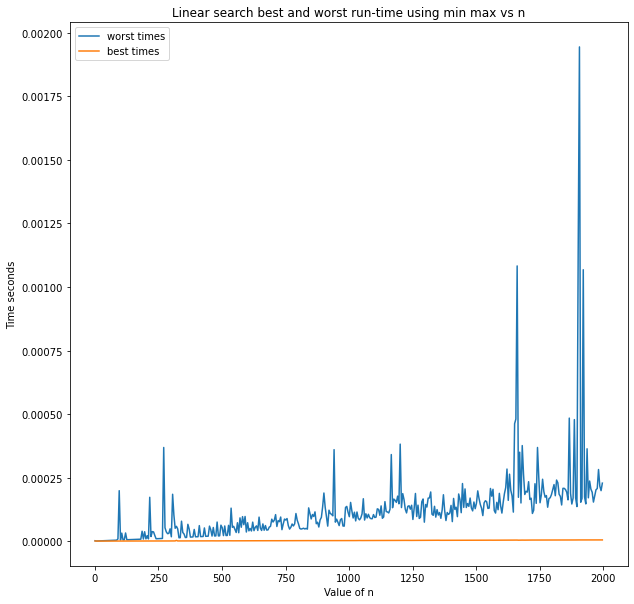

In [72]:
plt.figure(figsize=(10,10))
plt.plot(range(1, MAX_SEARCH, STEP), worst_iter1, label="worst times")
plt.plot(range(1, MAX_SEARCH, STEP), best_iter1, label="best times")
plt.title("Linear search best and worst run-time using min max vs n")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend()
#plt.savefig('best_worst_linear_minmax.png')

In [75]:
best_iter2, worst_iter2 = best_worst_runtime(iter_binary, search_vals, REPEAT, STEP)

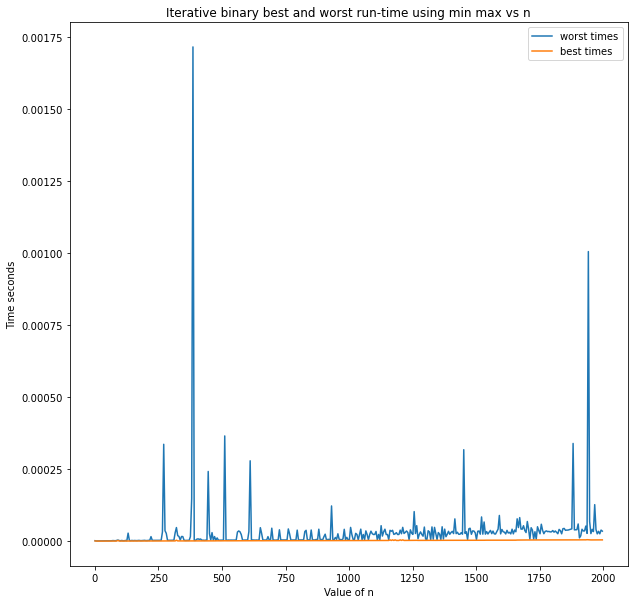

In [78]:
plt.figure(figsize=(10,10))
plt.plot(range(1, MAX_SEARCH, STEP), worst_iter2, label="worst times")
plt.plot(range(1, MAX_SEARCH, STEP),best_iter2, label="best times")
plt.title("Iterative binary best and worst run-time using min max vs n")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend()
#plt.savefig('best_worst_binary_minmax.png')

From the above plots we can see that the best and worst cases are in line with the previously calculated values. There does appear to be however a much large range of variability using the max and min python functions to determine the best and worse cases. This can again be arrtibuted to the varying amount of time it takes for a process to complete, this method does not handle outlier values well and this comes across in the plots produced. This suggests to us that the anaylitically caluclated best and worst running times are correct and that for the iterative algrothim, worst case time complexity increases with $\mathcal{O(n)}$ while best case remains at $\mathcal{O(1)}$. For the iterative binary method, the worst case is indeed $\mathcal{O(log\ n)}$ while best case remains at $\mathcal{O(1)}$ 

# Unit tests

In [79]:
# these unit tests are based on the code presented in lab 3

class TestWorstRuntime(unittest.TestCase):
    """Unit tests for the worst_runtime function"""
    def test1(self):
        t = worst_runtime(linear_search, [1, 2, 3], 5)
        self.assertTrue(len(t) == 3)
    
    def test2(self):
        t = worst_runtime(linear_search, [1, 2, 3, 4, 5, 10, 200], 5)
        self.assertTrue(len(t) == 7)

class TestBestRuntimeLinear(unittest.TestCase):
    """Unit tests for the best_runtime_linear function"""
    def test1(self):
        t = best_runtime_linear([1, 2, 3], 5)
        self.assertTrue(len(t) == 3)
    
    def test2(self):
        t = best_runtime_linear([1, 2, 3, 4, 5, 10, 200], 5)
        self.assertTrue(len(t) == 7)

class TestBestRuntimeBinary(unittest.TestCase):
    """Unit tests for the best_runtime_binary function"""
    def test1(self):
        t = best_runtime_binary([1, 2, 3], 5)
        self.assertTrue(len(t) == 3)
    
    def test2(self):
        t = best_runtime_binary([1, 2, 3, 4, 5, 10, 200], 5)
        self.assertTrue(len(t) == 7)

class TestBestRuntimeBinary(unittest.TestCase):
    """Unit tests for the best_worst_runtime function"""
    def test1(self):
        t1, t2 = best_worst_runtime(linear_search, [1,2,3,4,5], 2, 2)
        self.assertTrue(len(t1) == 5//2)
        self.assertTrue(len(t2) == 5//2)
    
    def test2(self):
        t1, t2 = best_worst_runtime(linear_search, [i for i in range(10)], 2, 2)
        self.assertTrue(len(t1) == 5)
        self.assertTrue(len(t2) == 5)


unittest.main(argv=[''], verbosity=2, exit=False)

test1 (__main__.TestAverageSearch) ... ok
test1 (__main__.TestAverageTimes) ... ok
test1 (__main__.TestBestRuntimeBinary) ... ok
test2 (__main__.TestBestRuntimeBinary) ... ok
test1 (__main__.TestBestRuntimeLinear) ... ok
test2 (__main__.TestBestRuntimeLinear) ... ok
test1 (__main__.TestImplementFactorial) ... ok
test1 (__main__.TestIterative) ... ok
test_2 (__main__.TestIterative) ... ok
test_3 (__main__.TestIterative) ... ok
test1 (__main__.TestIterativeBinary) ... ok
test_2 (__main__.TestIterativeBinary) ... ok
test_3 (__main__.TestIterativeBinary) ... ok
test_4 (__main__.TestIterativeBinary) ... ok
test_5 (__main__.TestIterativeBinary) ... ok
test1 (__main__.TestLinearSearch) ... ok
test_2 (__main__.TestLinearSearch) ... ok
test_3 (__main__.TestLinearSearch) ... ok
test_4 (__main__.TestLinearSearch) ... ok
test_5 (__main__.TestLinearSearch) ... ok
test1 (__main__.TestNonTail) ... ok
test_2 (__main__.TestNonTail) ... ok
test_3 (__main__.TestNonTail) ... ok
test1 (__main__.TestTail) .

# Use curve-fitting algorithms to find the equation of the running times obtained from Tasks 2-4.  See the attached example

Equation of running times: f(n) = -9.161948176904438e-05 + n * 3.527148567689315e-07
Linear funcion coefficients:
[-9.16194818e-05  3.52714857e-07]
Covariance of coefficients:
[[ 3.93283535e-12 -2.94888899e-15]
 [-2.94888899e-15  2.94888903e-18]]


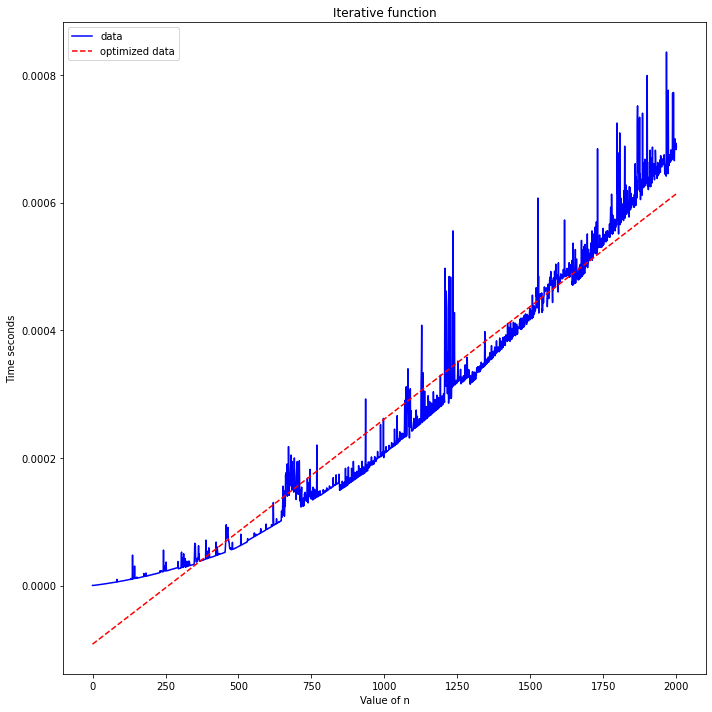

In [98]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(0, MAX_LIMIT, num = MAX_LIMIT) 
  
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + (b * x) # fit linear line
  
param, param_cov = curve_fit(test, x, avgtimes1) 
print("Equation of running times: f(n) =", param[0],"+ n *", param[1])
print("Linear funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0] + (param[1]*x))
plt.figure(figsize=(10,10))
plt.plot(x, avgtimes1, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.title("Iterative function")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5Iterative_function_average_curve.png')

Equation of running times: f(n) = -0.0001609376730579121 + n * 6.421105089433363e-07
Sine funcion coefficients:
[-1.60937673e-04  6.42110509e-07]
Covariance of coefficients:
[[ 2.05493576e-11 -1.54081641e-14]
 [-1.54081641e-14  1.54081639e-17]]


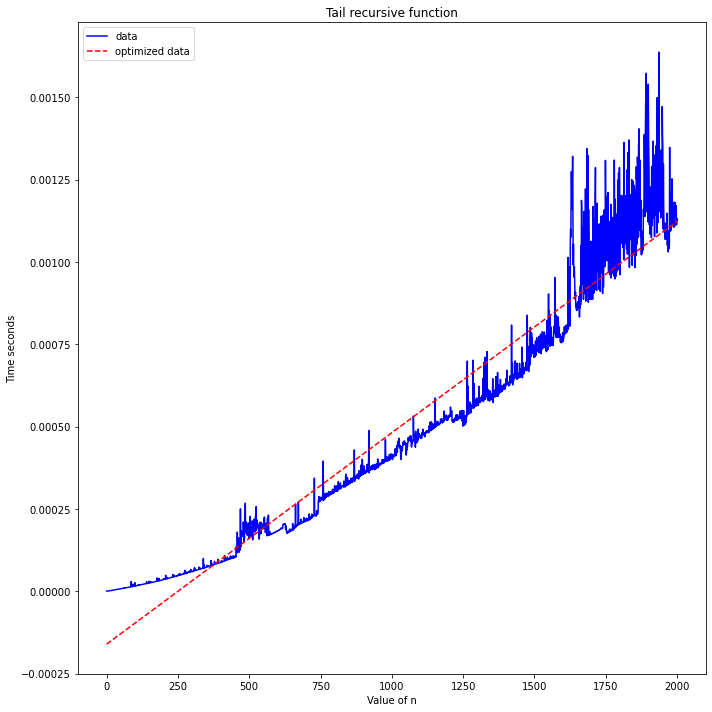

In [99]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(0, MAX_LIMIT, num = MAX_LIMIT) 
  
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + (b * x) # fit linear line
  
param, param_cov = curve_fit(test, x, avgtimes2) 
print("Equation of running times: f(n) =", param[0],"+ n *", param[1])  
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0] + (param[1]*x))
plt.figure(figsize=(10,10))
plt.plot(x, avgtimes2, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.legend() 
plt.title("Tail recursive function")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5tailrec_function_average_curve.png')

Equation of running times: f(n) = -0.00014935376598002685 + n * 6.017516514166775e-07
Sine funcion coefficients:
[-1.49353766e-04  6.01751651e-07]
Covariance of coefficients:
[[ 2.85111526e-11 -2.13780170e-14]
 [-2.13780170e-14  2.13780168e-17]]


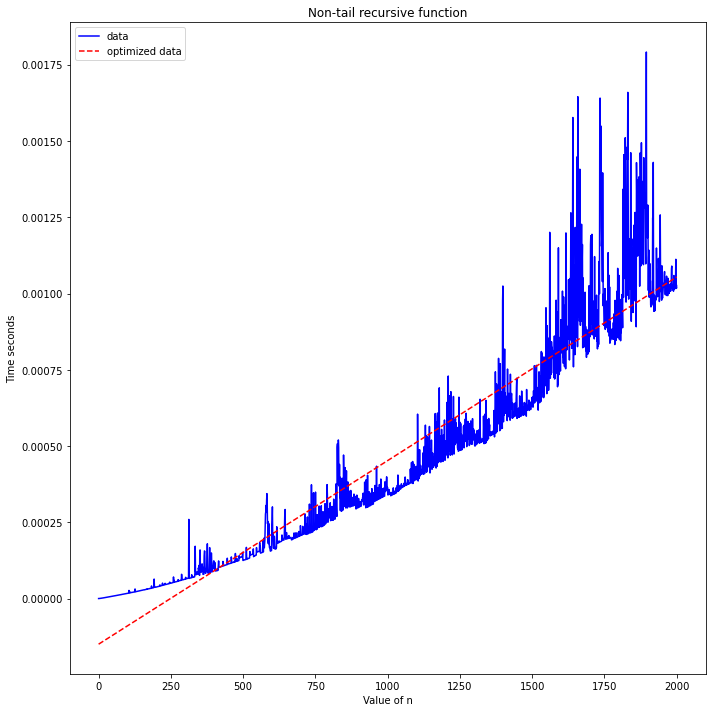

In [100]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(0, MAX_LIMIT, num = MAX_LIMIT) 
  
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + (b * x) # fit linear line
  
param, param_cov = curve_fit(test, x, avgtimes3) 
print("Equation of running times: f(n) =", param[0],"+ n *", param[1])    
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0] + (param[1]*x))
plt.figure(figsize=(10,10))
plt.plot(x, avgtimes3, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.legend() 
plt.title("Non-tail recursive function")
plt.xlabel("Value of n")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5nontailrec_function_average_curve.png') 

Equation of running times: f(n) = -3.5540170315659847e-06 + n * 5.030729102179676e-08
Sine funcion coefficients:
[-3.55401703e-06  5.03072910e-08]
Covariance of coefficients:
[[ 5.74321539e-14 -4.30633467e-17]
 [-4.30633467e-17  4.30633469e-20]]


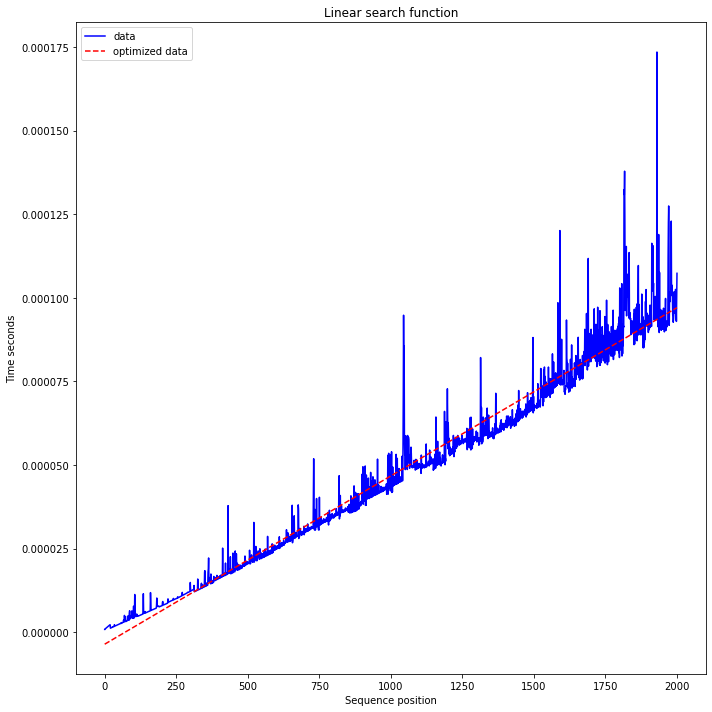

In [101]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(0, MAX_LIMIT, num = MAX_LIMIT) 
  
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + (b * x) # fit linear line
  
param, param_cov = curve_fit(test, x, lineartimes) 
print("Equation of running times: f(n) =", param[0],"+ n *", param[1])   
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0] + (param[1]*x))
plt.figure(figsize=(10,10))
plt.plot(x, lineartimes, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data")
plt.legend() 
plt.title("Linear search function")
plt.xlabel("Sequence position")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5linear_search_average.png') 

As the running times for the iterative binary algrothim depend on position, for example if the search value is in the middle value it will be found within order $\mathcal{O(1)}$ while the middle + 1 value will take on average approximately $\mathcal{O(log\ n)}$ for large values of n. There is no simple smooth line to fit this curve. Therefore it makes more sense to sort the runtime to find each value and fit a line to this as this will be approximately logarithmic. This is done in the following code. This is done as values in the postitions 1/2, 1/4, 3/4, 7/8 etc will take less time as they are searched first with the time taken to find values lower down this list taking longer.

### Important!

For the average times for each position in the sequence for the iterative binary search algrothim below I decided to sort the times to display how these approximate a logarithmic function. This provides a much clearer picture of the running times as values at position 1/2, 1/4, 3/4 etc will be sorted first. As this does not directly increase as the position in the sequence increases this was a work around to show to display the logarithmic search time.

Equation of running times: f(n) = -6.762356919101338e-08 + log(n) * 2.9496217445270215e-07
Sine funcion coefficients:
[-6.76235692e-08  2.94962174e-07]
Covariance of coefficients:
[[ 1.80481193e-15 -2.67299600e-16]
 [-2.67299600e-16  4.04799345e-17]]


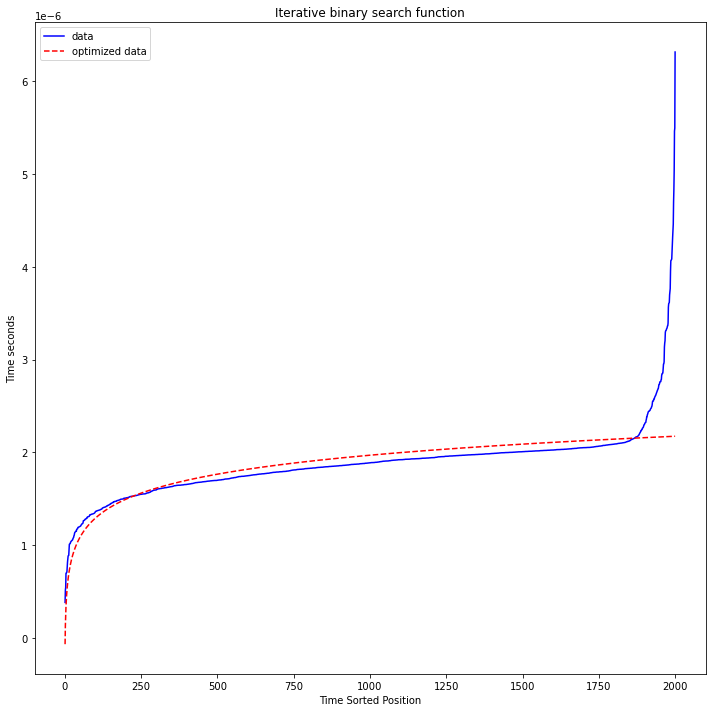

In [102]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(1, MAX_LIMIT, num = MAX_LIMIT) 
iterbintimes.sort()
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + b * np.log(x)  # fit lograthmic line
  
param, param_cov = curve_fit(test, x, iterbintimes) 
print("Equation of running times: f(n) =", param[0],"+ log(n) *", param[1])  
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0] + param[1]*np.log(x))
plt.figure(figsize=(10,10))
plt.plot(x, iterbintimes, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.legend() 
plt.title("Iterative binary search function")
plt.xlabel("Time Sorted Position")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5iterative_search_average.png') 

Equation of running times: f(n) = -2.7598325143845413e-06 + n * 4.935580450581268e-08
Sine funcion coefficients:
[-2.75983251e-06  4.93558045e-08]
Covariance of coefficients:
[[ 2.99936728e-14 -2.24896299e-17]
 [-2.24896299e-17  2.24896301e-20]]


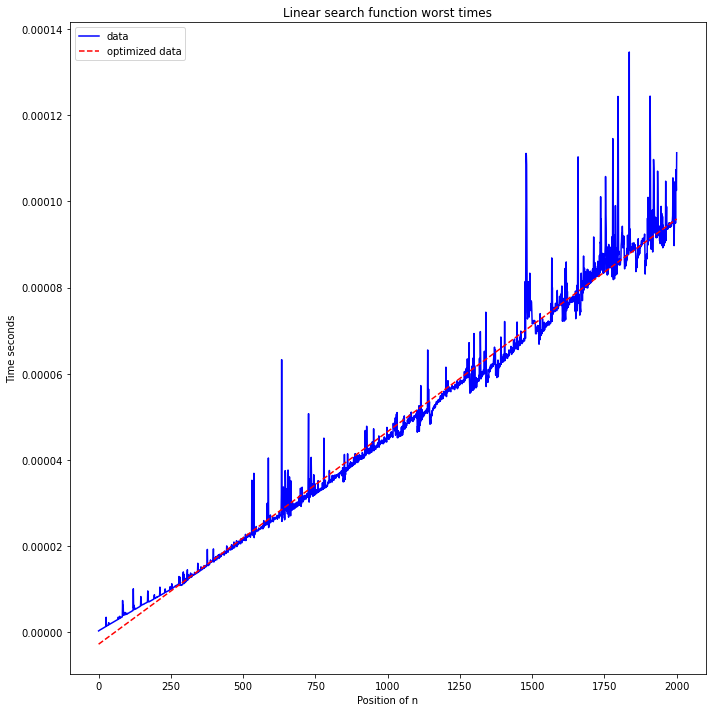

In [103]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(0, 2000, num = 2000) 
  
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + (b * x) # fit linear line
  
param, param_cov = curve_fit(test, x, worst_linear) 
print("Equation of running times: f(n) =", param[0],"+ n *", param[1])  
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = param[0] + (x * param[1])
plt.figure(figsize=(10,10))
plt.plot(x, worst_linear, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.legend() 
plt.title("Linear search function worst times")
plt.xlabel("Position of n")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5linear_search_worst.png') 

Equation of running times: f(n) = 4.867908109691322e-08 + log(n) * 3.181693171282752e-07
Sine funcion coefficients:
[4.86790811e-08 3.18169317e-07]
Covariance of coefficients:
[[ 3.98775279e-15 -5.90601541e-16]
 [-5.90601541e-16  8.94408792e-17]]


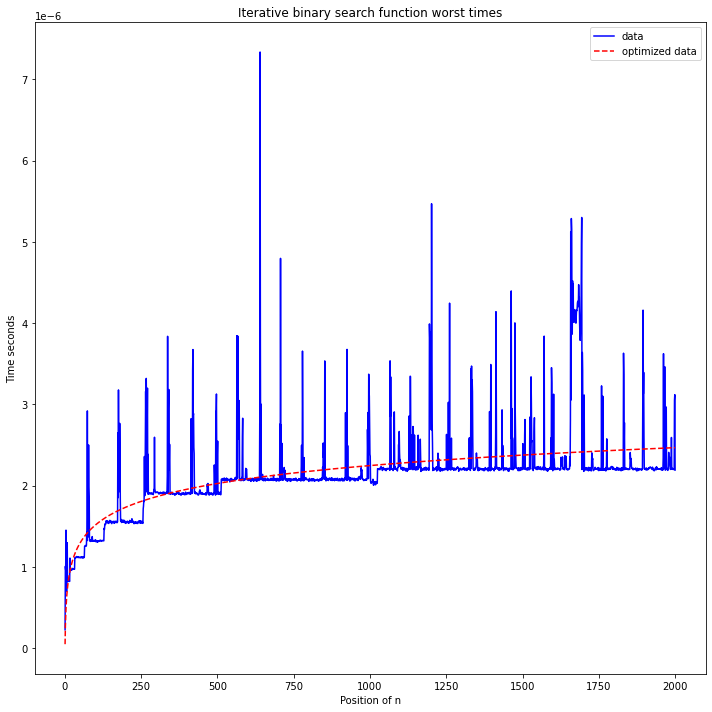

In [104]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(1, 2000, num = 2000) 

# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + b * np.log(x) # fit logarithmic line
  
param, param_cov = curve_fit(test, x, worst_binary) 
print("Equation of running times: f(n) =", param[0],"+ log(n) *", param[1])  
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = (param[0] + param[1]*np.log(x))
plt.figure(figsize=(10,10))
plt.plot(x, worst_binary, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.legend() 
plt.title("Iterative binary search function worst times")
plt.xlabel("Position of n")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5iterative_binary_search_worst.png') 

Equation of running times: f(n) = 4.3094331011638043e-07 + n * 2.2549192311555966e-11
Sine funcion coefficients:
[4.30943310e-07 2.25491923e-11]
Covariance of coefficients:
[[ 3.91367666e-16 -2.93452348e-19]
 [-2.93452348e-19  2.93452348e-22]]


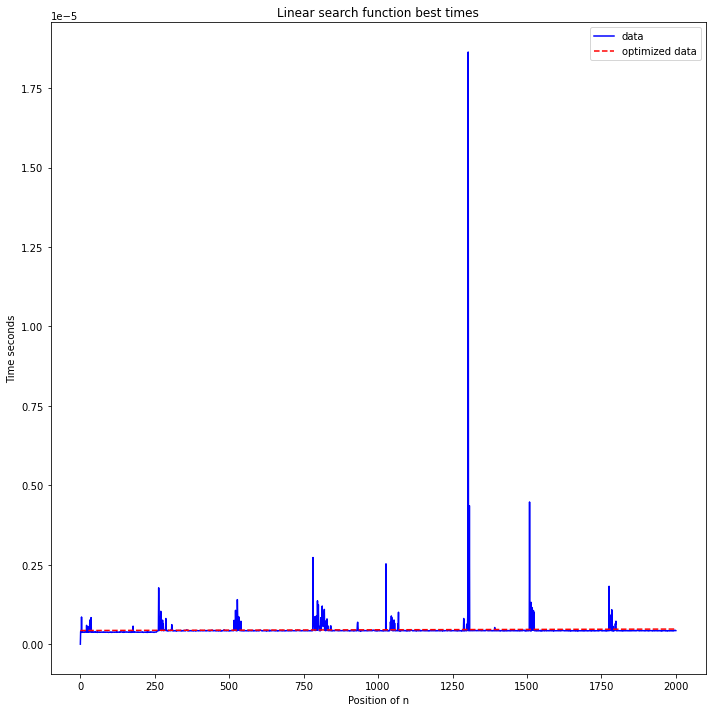

In [105]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(0, 2000, num = 2000) 
  
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + (b * x) # fit linear line
  
param, param_cov = curve_fit(test, x, best_linear)
print("Equation of running times: f(n) =", param[0],"+ n *", param[1])
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = param[0] + (x * param[1])
plt.figure(figsize=(10,10))
plt.plot(x, best_linear, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.legend() 
plt.title("Linear search function best times")
plt.xlabel("Position of n")
plt.ylabel("Time seconds")
plt.legend() 
plt.tight_layout()
#plt.savefig('q5linear_search_worst_best.png') 

Equation of running times: f(n) = 3.771926130692124e-07 + n * 1.785788675811943e-11
Sine funcion coefficients:
[3.77192613e-07 1.78578868e-11]
Covariance of coefficients:
[[ 1.39535626e-17 -1.04625550e-20]
 [-1.04625550e-20  1.04625550e-23]]


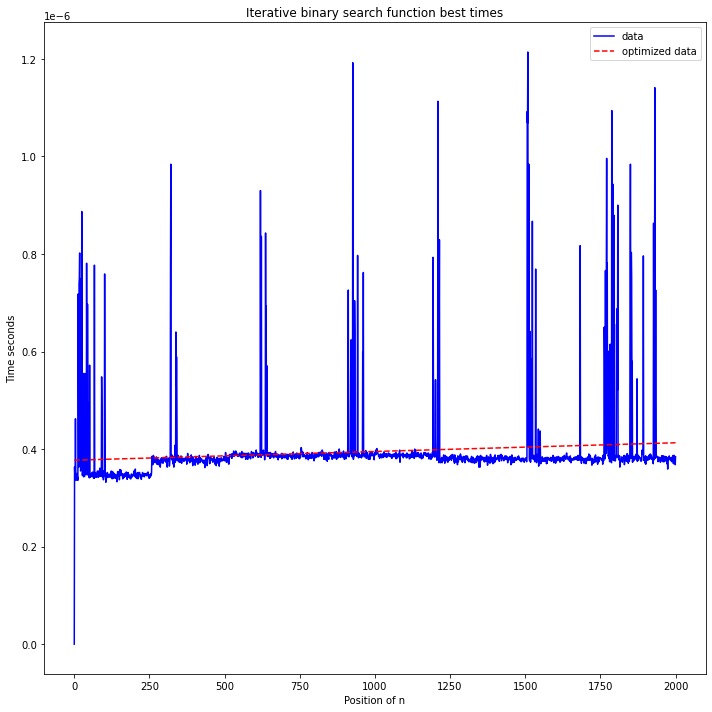

In [106]:
#the following code origionated form https://www.geeksforgeeks.org/scipy-curve-fitting/
x = np.linspace(0, 2000, num = 2000) 
  
# The coefficients are much bigger. 
  
def test(x, a, b): 
    return a + (b * x) # fit linear line
  
param, param_cov = curve_fit(test, x, best_binary)
print("Equation of running times: f(n) =", param[0],"+ n *", param[1])
print("Sine funcion coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 
  
ans = param[0] + (x * param[1])
plt.figure(figsize=(10,10))
plt.plot(x, best_binary, '-', color ='blue', label ="data") 
plt.plot(x, ans, '--', color ='red', label ="optimized data") 
plt.legend() 
plt.title("Iterative binary search function best times")
plt.xlabel("Position of n")
plt.ylabel("Time seconds")
plt.legend()
plt.tight_layout()
#plt.savefig('q5iterative_binary_search_best.png') 